In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [171]:
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns
import pandas as pd
import imblearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from C45 import C45Classifier

In [172]:
Beans = pd.read_excel('DryBeanDataSet.xlsx')
Beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.82765,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.80264,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


In [173]:
Beans["Colour"] = Beans["Colour"].astype('category')
Beans["Constantness"] = Beans["Constantness"].astype('category')
Beans["Class"] = Beans["Class"].astype('category')
Beans["Extent"] = pd.to_numeric(Beans["Extent"], errors='coerce')
Beans["Compactness"] = pd.to_numeric(Beans["Compactness"], errors='coerce')
Beans["ShapeFactor6"] = pd.to_numeric(Beans["ShapeFactor6"], errors='coerce')
Beans.dtypes

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
AspectRation        float64
Eccentricity        float64
ConvexArea            int64
Constantness       category
EquivDiameter       float64
Colour             category
Extent              float64
Solidity            float64
roundness           float64
Compactness         float64
ShapeFactor1        float64
ShapeFactor2        float64
ShapeFactor3        float64
ShapeFactor4        float64
ShapeFactor5        float64
ShapeFactor6        float64
Class              category
Sort order          float64
dtype: object

In [174]:
Beans["Class"].replace('?', np.nan, inplace=True)
Beans["Colour"].replace('?', np.nan, inplace=True)

In [175]:
Beans.isna().sum()

Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class              17
Sort order          0
dtype: int64

In [178]:
Beans = Beans[Beans['Class'].notna()]
Beans

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.827650,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.802640,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,23018,578.382,203.761000,144.297607,1.412089,0.706041,23465,1,171.194123,black,...,0.864665,0.840171,0.008852,0.002721,0.705888,2.197446,0.996776,85.821969,DERMASON,0.764478
13607,69773,1095.057,387.116310,231.153291,1.674717,0.802155,71055,1,298.056610,brown,...,0.731179,0.769941,0.005548,0.001203,0.592809,1.004792,0.992787,152.980591,BARBUNYA,0.679735
13608,55773,968.988,347.920243,204.491191,1.701395,0.809040,57047,0,266.481499,brown,...,0.746444,0.765927,0.006238,0.001324,0.586644,2.219590,0.998113,102.437378,BARBUNYA,0.946849
13609,64235,1005.875,409.304636,201.686606,2.029409,0.870169,65018,1,285.983465,white,...,0.797799,0.698706,0.006372,0.000937,0.488190,2.078504,0.990736,174.754039,HOROZ,0.046135


In [179]:
Beans.isna().sum()

Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class               0
Sort order          0
dtype: int64

In [29]:
# Beans["Constantness"] = pd.to_numeric(Beans["Constantness"], errors='coerce')
Beans_encoded = pd.get_dummies(Beans.dropna(), columns=['Colour'], dtype=float)
# label = LabelEncoder()
# Beans_encoded["Class"] = label.fit_transform(Beans_encoded["Class"])
# Beans_encoded = Beans_encoded.drop([2762, 3941, 4780])
# print(Beans_encoded.max())
# Beans_encoded = Beans.dropna()
Beans_encoded = Beans_encoded.reset_index(drop=True)
print(Beans_encoded.columns.tolist())
Beans_encoded["EquivDiameter"].idxmin()
Beans_encoded

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'Constantness', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6', 'Class', 'Sort order', 'Colour_black', 'Colour_brown', 'Colour_green', 'Colour_white']


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Extent,...,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order,Colour_black,Colour_brown,Colour_green,Colour_white
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,0.767184,...,0.556914,3.487008,0.984066,50.809833,CALI,0.134791,0.0,1.0,0.0,0.0
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,0.757739,...,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848,1.0,0.0,0.0,0.0
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,0.790885,...,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684,0.0,0.0,1.0,0.0
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,0.761092,...,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130,0.0,1.0,0.0,0.0
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,0.721543,...,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13554,23018,578.382,203.761000,144.297607,1.412089,0.706041,23465,1,171.194123,0.781994,...,0.705888,2.197446,0.996776,85.821969,DERMASON,0.764478,1.0,0.0,0.0,0.0
13555,69773,1095.057,387.116310,231.153291,1.674717,0.802155,71055,1,298.056610,0.762446,...,0.592809,1.004792,0.992787,152.980591,BARBUNYA,0.679735,0.0,1.0,0.0,0.0
13556,55773,968.988,347.920243,204.491191,1.701395,0.809040,57047,0,266.481499,0.765377,...,0.586644,2.219590,0.998113,102.437378,BARBUNYA,0.946849,0.0,1.0,0.0,0.0
13557,64235,1005.875,409.304636,201.686606,2.029409,0.870169,65018,1,285.983465,0.773990,...,0.488190,2.078504,0.990736,174.754039,HOROZ,0.046135,0.0,0.0,0.0,1.0


In [30]:
Beans_encoded.dtypes

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
AspectRation        float64
Eccentricity        float64
ConvexArea            int64
Constantness       category
EquivDiameter       float64
Extent              float64
Solidity            float64
roundness           float64
Compactness         float64
ShapeFactor1        float64
ShapeFactor2        float64
ShapeFactor3        float64
ShapeFactor4        float64
ShapeFactor5        float64
ShapeFactor6        float64
Class              category
Sort order          float64
Colour_black        float64
Colour_brown        float64
Colour_green        float64
Colour_white        float64
dtype: object

In [124]:
X = Beans_encoded.drop(['Sort order', 'Class'], axis = 1)
y = Beans_encoded['Class']

In [125]:
y.value_counts()

DERMASON    3535
SIRA        2632
SEKER       2017
HOROZ       1917
CALI        1623
BARBUNYA    1317
BOMBAY       518
Name: Class, dtype: int64

In [126]:
smote = SMOTE(random_state=42)
tomek = TomekLinks()

# Create a pipeline with SMOTE and Tomek Links
pipeline = Pipeline(steps=[('tomek', tomek), ('smote', smote)])

X_resampled, y_resampled = pipeline.fit_resample(X,np.asarray(y))

In [127]:
pd.DataFrame(y_resampled).value_counts()

BARBUNYA    3205
BOMBAY      3205
CALI        3205
DERMASON    3205
HOROZ       3205
SEKER       3205
SIRA        3205
dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

In [ ]:
clf = DecisionTreeClassifier(random_state=42, criterion="entropy", min_samples_split=10, min_samples_leaf=2)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=y.unique()))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=y.unique())
plt.xticks(rotation=90)
plt.show()

In [341]:
from myTree import ClassificationTree

X = Beans.drop(['Sort order', 'Class'], axis = 1)
y = Beans['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mytree = ClassificationTree(max_depth=None, min_samples_split=2, random_state=42, data_split_size=0.2)
mytree.fit(X_train, y_train)

Inducing tree for 7612 samples
Best feature to split on: Constantness
   Inducing tree for 6831 samples
Best feature to split on: MajorAxisLength
      Inducing tree for 3798 samples
Best feature to split on: ShapeFactor1
         Inducing tree for 2060 samples
Best feature to split on: Compactness
            Inducing tree for 970 samples
Best feature to split on: Area
               Inducing tree for 396 samples
Best feature to split on: Perimeter
                  Inducing tree for 174 samples
Best feature to split on: Solidity
                     Inducing tree for 133 samples
Best feature to split on: MinorAxisLength
                        Inducing tree for 127 samples
Best feature to split on: ShapeFactor5
                           Inducing tree for 5 samples
                           Inducing tree for 122 samples
Best feature to split on: Extent
                              Inducing tree for 77 samples
Best feature to split on: ShapeFactor4
                                 I

                              Inducing tree for 7 samples
Best feature to split on: Eccentricity
                                 Inducing tree for 1 samples
                                 Inducing tree for 6 samples
Best feature to split on: Extent
                                    Inducing tree for 1 samples
                                    Inducing tree for 5 samples
Best feature to split on: ShapeFactor6
                                       Inducing tree for 4 samples
                                       Inducing tree for 1 samples
                              Inducing tree for 2 samples
Best feature to split on: MinorAxisLength
                                 Inducing tree for 1 samples
                                 Inducing tree for 1 samples
                  Inducing tree for 222 samples
Best feature to split on: ShapeFactor5
                     Inducing tree for 124 samples
Best feature to split on: Extent
                        Inducing tree for 97 samples
B

                                    Inducing tree for 3 samples
Best feature to split on: Solidity
                                       Inducing tree for 1 samples
                                       Inducing tree for 2 samples
                                    Inducing tree for 4 samples
                                 Inducing tree for 6 samples
                           Inducing tree for 21 samples
Best feature to split on: ConvexArea
                              Inducing tree for 18 samples
Best feature to split on: ShapeFactor6
                                 Inducing tree for 5 samples
Best feature to split on: MinorAxisLength
                                    Inducing tree for 1 samples
                                    Inducing tree for 4 samples
                                 Inducing tree for 13 samples
Best feature to split on: MinorAxisLength
                                    Inducing tree for 3 samples
Best feature to split on: Extent
                   

Best feature to split on: ShapeFactor6
                           Inducing tree for 38 samples
Best feature to split on: roundness
                              Inducing tree for 15 samples
Best feature to split on: ShapeFactor5
                                 Inducing tree for 13 samples
Best feature to split on: AspectRation
                                    Inducing tree for 6 samples
Best feature to split on: Extent
                                       Inducing tree for 2 samples
                                       Inducing tree for 4 samples
Best feature to split on: Eccentricity
                                          Inducing tree for 3 samples
                                          Inducing tree for 1 samples
                                    Inducing tree for 7 samples
                                 Inducing tree for 2 samples
                              Inducing tree for 23 samples
Best feature to split on: ConvexArea
                                 Induci

                                                         Inducing tree for 2 samples
                                                         Inducing tree for 15 samples
Best feature to split on: Colour
                                                            Inducing tree for 7 samples
                                                            Inducing tree for 8 samples
                                                   Inducing tree for 2 samples
                                             Inducing tree for 3 samples
                                          Inducing tree for 7 samples
Best feature to split on: ShapeFactor2
                                             Inducing tree for 1 samples
                                             Inducing tree for 6 samples
                                       Inducing tree for 3 samples
                                 Inducing tree for 5 samples
                              Inducing tree for 14 samples
Best feature to split on: 

            Inducing tree for 1449 samples
Best feature to split on: Colour
               Inducing tree for 1422 samples
Best feature to split on: ShapeFactor3
                  Inducing tree for 839 samples
Best feature to split on: roundness
                     Inducing tree for 118 samples
Best feature to split on: Compactness
                        Inducing tree for 37 samples
Best feature to split on: ShapeFactor5
                           Inducing tree for 24 samples
Best feature to split on: ShapeFactor4
                              Inducing tree for 1 samples
                              Inducing tree for 23 samples
Best feature to split on: EquivDiameter
                                 Inducing tree for 9 samples
Best feature to split on: Perimeter
                                    Inducing tree for 7 samples
                                    Inducing tree for 2 samples
                                 Inducing tree for 14 samples
                           Inducing

                                 Inducing tree for 39 samples
                                 Inducing tree for 17 samples
Best feature to split on: Eccentricity
                                    Inducing tree for 10 samples
Best feature to split on: Compactness
                                       Inducing tree for 5 samples
Best feature to split on: Perimeter
                                          Inducing tree for 4 samples
Best feature to split on: MinorAxisLength
                                             Inducing tree for 1 samples
                                             Inducing tree for 3 samples
                                          Inducing tree for 1 samples
                                       Inducing tree for 5 samples
                                    Inducing tree for 7 samples
                           Inducing tree for 63 samples
Best feature to split on: Solidity
                              Inducing tree for 52 samples
Best feature to split 

                     Inducing tree for 35 samples
Best feature to split on: Area
                        Inducing tree for 28 samples
Best feature to split on: Solidity
                           Inducing tree for 23 samples
Best feature to split on: AspectRation
                              Inducing tree for 11 samples
                              Inducing tree for 12 samples
Best feature to split on: ConvexArea
                                 Inducing tree for 8 samples
                                 Inducing tree for 4 samples
Best feature to split on: Extent
                                    Inducing tree for 1 samples
                                    Inducing tree for 3 samples
                           Inducing tree for 5 samples
Best feature to split on: MinorAxisLength
                              Inducing tree for 4 samples
                              Inducing tree for 1 samples
                        Inducing tree for 7 samples
                     Inducing tre

                        Inducing tree for 6 samples
Best feature to split on: Perimeter
                           Inducing tree for 1 samples
                           Inducing tree for 5 samples
                        Inducing tree for 10 samples
                     Inducing tree for 2 samples
                  Inducing tree for 85 samples
Best feature to split on: Perimeter
                     Inducing tree for 5 samples
Best feature to split on: Solidity
                        Inducing tree for 3 samples
                        Inducing tree for 2 samples
Best feature to split on: MinorAxisLength
                           Inducing tree for 1 samples
                           Inducing tree for 1 samples
                     Inducing tree for 80 samples
Best feature to split on: ShapeFactor4
                        Inducing tree for 78 samples
                        Inducing tree for 2 samples
Best feature to split on: MinorAxisLength
                           Inducing tree 

In [342]:
mytree.print_tree(mytree.root)

0 Node: Split on 'Constantness'
  If Constantness == 1:
  1 Node: Split on 'MajorAxisLength'
    If MajorAxisLength == < 309.9990007137115:
    2 Node: Split on 'ShapeFactor1'
      If ShapeFactor1 == < 0.007064545917320835:
      3 Node: Split on 'Compactness'
        If Compactness == < 0.8472455978099115:
        4 Node: Split on 'Area'
          If Area == < 42159.5:
          5 Node: Split on 'Perimeter'
            If Perimeter == < 745.9065:
            6 Node: Split on 'Solidity'
              If Solidity == < 0.9906009601379899:
              7 Node: Split on 'MinorAxisLength'
                If MinorAxisLength == < 189.469780880975:
                8 Node: Split on 'ShapeFactor5'
                  If ShapeFactor5 == < 0.9935377340172991:
                  Leaf: Predict SIRA
                  If ShapeFactor5 == >= 0.9935377340172991:
                  9 Node: Split on 'Extent'
                    If Extent == < 0.782633862588032:
                    10 Node: Split on 'ShapeFac

In [343]:
y_pred = mytree.predict(X_train)
(y_train == y_pred).sum() / len(y_train)

0.9457698370993168

In [344]:
y_pred = mytree.predict(X_test)
y_pred

1065     DERMASON
3895        HOROZ
3577        HOROZ
7292     BARBUNYA
13141       SEKER
           ...   
10210    DERMASON
658          CALI
626      BARBUNYA
9829        HOROZ
765      DERMASON
Length: 4079, dtype: object

In [345]:
(y_test == y_pred).sum() / len(y_test)

0.9203236087276293

In [346]:
y_test_str = np.array(y_test, dtype=str)
print(np.unique(y_test_str))
y_pred_str = np.array(y_pred, dtype=str)
print(np.unique(y_pred_str))
print(pd.Series(y_pred_str).value_counts())
print('Classification Report:')
print(classification_report(y_test_str, y_pred_str, target_names=np.unique(y_test_str)))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
DERMASON    1115
SIRA         757
HOROZ        576
SEKER        564
CALI         512
BARBUNYA     386
BOMBAY       169
dtype: int64
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.88      0.88      0.88       384
      BOMBAY       1.00      0.99      1.00       170
        CALI       0.91      0.92      0.91       511
    DERMASON       0.90      0.92      0.91      1089
       HOROZ       1.00      0.97      0.98       593
       SEKER       0.98      0.97      0.98       571
        SIRA       0.85      0.85      0.85       761

    accuracy                           0.92      4079
   macro avg       0.93      0.93      0.93      4079
weighted avg       0.92      0.92      0.92      4079



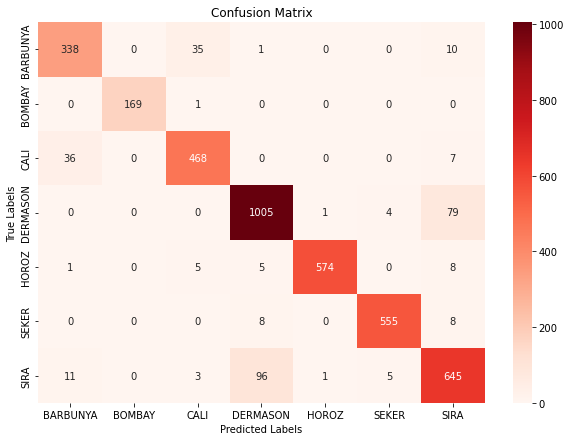

In [347]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str, labels=np.unique(y_test_str))

# Convert to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=np.unique(y_test_str), columns=np.unique(y_test_str))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', cbar=True, 
            xticklabels=np.unique(y_test_str), yticklabels=np.unique(y_test_str))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV

# k = 5

# clf = GridSearchCV(KNeighborsClassifier(), {
#     'n_neighbors': list(range(235, 335, 2))
# }, cv=k, return_train_score=True)

# clf.fit(best_beans, y_resampled)